
## Standard Score

Assuming a Bell-shaped normal distribution $N(\mu,\sigma)$, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is: $$ z = \frac{x_i-\mu}{\sigma} $$

That is the formula standardizes a given score $x_i$ to the (standard normal) z-distribution. 

<div class="alert-info">
You could standardize any normal distribution to a mean of zero ($\mu = 0$) and standard deviation of one ($\sigma = 1$) by subtracting its original mean and then dividing by its original standard deviation.
</div>

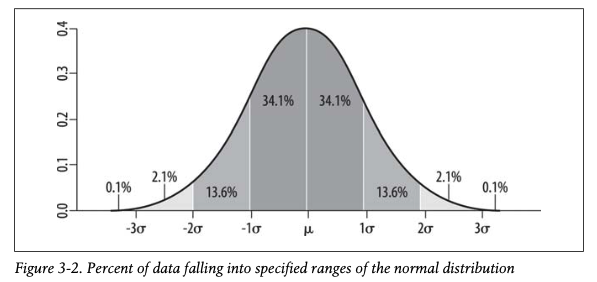

The Empirical Rule:

* 68% of the values are expected to be within one std away from the mean
* 95% of the values ... 2 stds away from the mean...
* 99.7% -> 3stds

How unusual is 10hrs of sleep?

* To get an estimate of how unusual a score is we calculate the *standard score*
* or Z-Score when dealing with normal distribution (sometimes called normalized score)
* $Z = \frac{x - \mu}{\sigma}$, 
* $\mu$ is the mean, $\sigma$ the standard deviation. 

<div class="alert-warning">
One great advantage of Z-scores is that they facilitate comparison of scores from populations with different means and standard deviations.
</div>

For instance, looking at one population x ~ N(100, 5) and another population y ~ N(50, 10), we can’t immediately say whether a score of 95 from the first population is more or less unusual than a score of 35 from the second population.

* $Z_1 = \frac{x_1 - \mu_1}{\sigma_1} = \frac{95 - 100}{5} = -1.00$
* $Z_2 = \frac{35 - 50}{10} = -1.50$

### Example

Let's say you get 85% on an exam. It sounds like a pretty good score an you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [40]:
# define the random seed
np.random.seed(42)

In [41]:
x_i = 85
mu = 60
sigma = 10
# generate a random normal distribution with 10k data points
x = np.random.normal(mu, sigma, 10000)

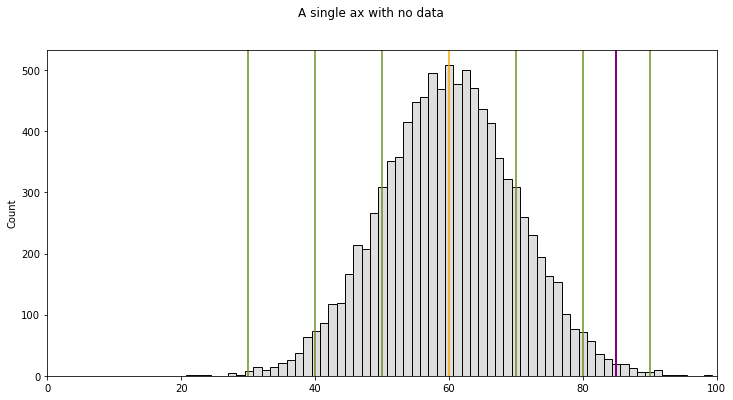

In [56]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x, color='lightgrey')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
fig.suptitle('A single ax with no data')

for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
    _ = plt.axvline(x_i, color='purple')

In [58]:
z = (x_i - np.mean(x))/np.std(x)
z

2.493627213305282

Less than 1% of the class outperformed you

In [60]:
len(np.where(x>85)[0])

68

In [61]:
np.percentile(x, 99)

83.2483020263407

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**.  
It is a good idea to individually investigate outliers in your data as they may represent an erroneous data point, that perhaps should be removed from further analysis

## What is a Boxplot?

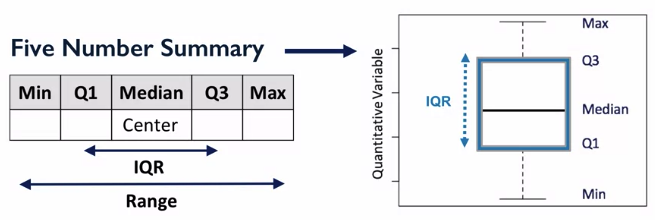

Q1 and Q3 are the 25th and 75th percentiles of our data and so the distance between them gives us that middle 50 percent for how spread out the middle 50 percent of our data is, called Interquartile Range (IQR).

* Boxplot is a visualization of the Five Number summary!
* Dashed lines are sometimes called whiskers

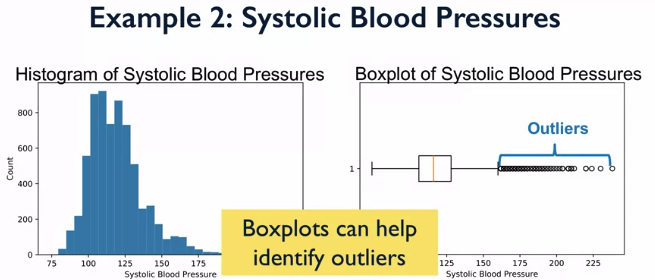

<div class="alert-success">
    <ul>
       <li> Univariate statistics: such as the mean describe characteristics of one variable. Bar charts and histograms are examples of univeriate graphic display </li>
       <li> Bivariate statistics such as Pearson’s correlation coefficient describe the relationship between two variables, and bivariate graphs such as the scatterplot display the relationship between two variables</li>
        <li>Multivariate statistics such as the multiple correlation and multivariate regression describe the relationship between more than two variables.</li>
    </ul>
</div>

## Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In [3]:
tips = sns.load_dataset("tips")

In [4]:
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
115,17.31,3.50,Female,No,Sun,Dinner,2
25,17.81,2.34,Male,No,Sat,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Creating Histograms

After we have a general feel for the data, it is often good to get a feel for the shape of the distribution of the data.

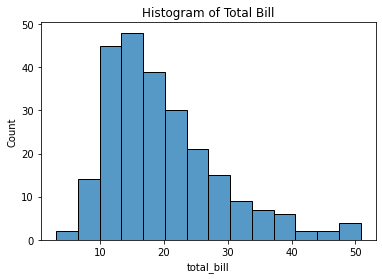

In [8]:
# plot a histogram of the total bill
sns.histplot(tips["total_bill"], kde=False).set_title("Histogram of Total Bill");

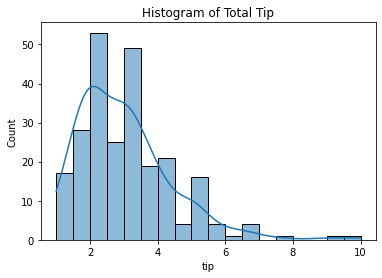

In [10]:
# plot a histogram of the tips
sns.histplot(tips["tip"], kde=True).set_title("Histogram of Total Tip");

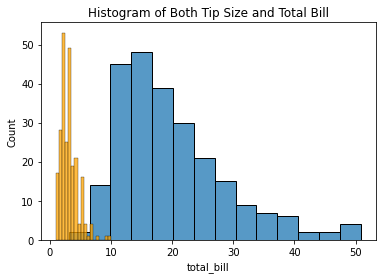

In [16]:
# Histogram of both
# Plot a histogram of both the total bill and the tips'
sns.histplot(tips["total_bill"], kde = False)
sns.histplot(tips["tip"], kde = False, 
             color='orange').set_title("Histogram of Both Tip Size and Total Bill");

### Creating Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers tha may exist.

Boxplots and histograms often complement each other and help an analyst get more infomarion about the data.

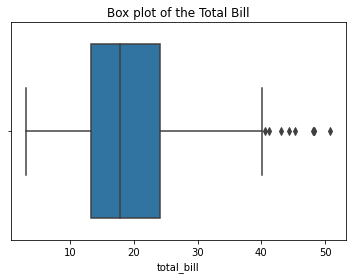

In [20]:
# Create a boxplot of the total bill amounts
sns.boxplot(x=tips["total_bill"]).set_title("Box plot of the Total Bill");

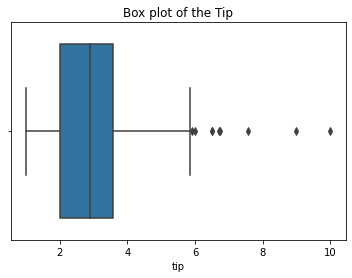

In [21]:
# Create a boxplot of the tips
sns.boxplot(x=tips["tip"]).set_title("Box plot of the Tip");

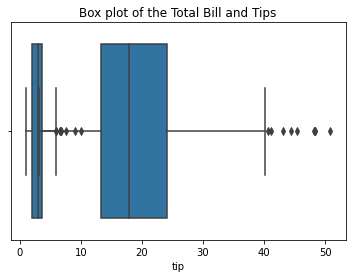

In [23]:
# Create a boxplot of the tips and total bill amounts - do not do it like this
sns.boxplot(x=tips["total_bill"])
sns.boxplot(x=tips["tip"]).set_title("Box plot of the Total Bill and Tips");

<div class="alert-danger">
We can see right now that they're plotting both on the same axis. And so this is something that we don't want.
</div>

### Creating Histograms and Boxplots Plotted by Groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Using graphs, we can see if there is a difference between the tipping amounts of smokers vs. non-smokers, if tipping varies according to the time of the day, or we can explore other trends in the data as well.

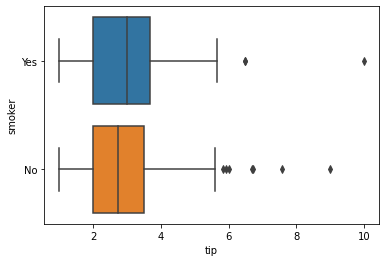

In [28]:
# Create a boxplot and histogram of the tips grouped by smoking status
sns.boxplot(x = tips["tip"], y = tips["smoker"]);

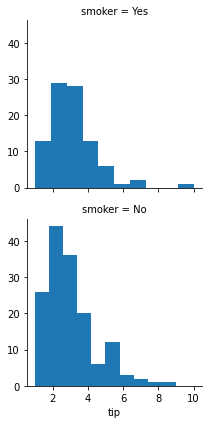

In [31]:
g = sns.FacetGrid(tips, row = "smoker")
# It allows us to plot on different axes
g = g.map(plt.hist, "tip")

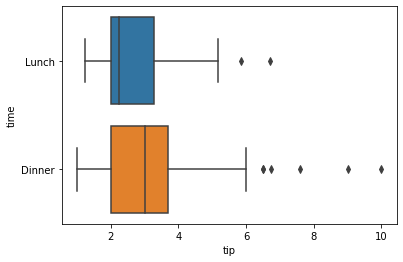

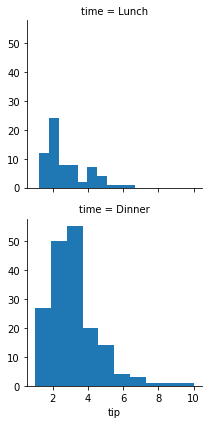

In [33]:
# Create a boxplot and histogram of the tips grouped by time of day
sns.boxplot(x=tips["tip"], y=tips['time'])

g = sns.FacetGrid(tips, row = "time")
g = g.map(plt.hist, "tip")

We can  note that there was way more observations for dinner than there was for lunch. These bars for dinner are much higher, indicating much more observational counts as opposed to these lower bars for lunch. So what this tells me is, typically at this restaurant, people are eating a lot more during dinner and typically they're leaving bigger tips during dinner. So if I was a waitstaff, I may want to work later shifts in order to get bigger tips.

<AxesSubplot:xlabel='tip', ylabel='day'>

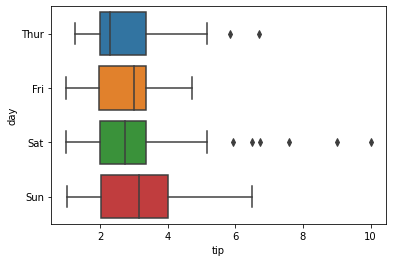

In [36]:
# Let's see if different days of the week have an impact on tips
sns.boxplot(x=tips["tip"], y=tips["day"])

* So it appears that the largest tips are given out on Sunday and the outliers are given out on Saturday. 
* It appears that the worse day for tips is Thursday, because it has the lowest median.
* Sunday maybe the best day because it has the highest median
* We can use different summary statistics though, to figure out what day we may want to work. If we wanted the possibility of maybe having the largest tip, we may want to work on Saturday because it seems like there are quite a few people that tend to eat out during Saturday that have larger tips.
* if we want the largest tip roughly on average, we can end up using Sunday as our day that we're going to work. And that's because this one has the highest median of the group.

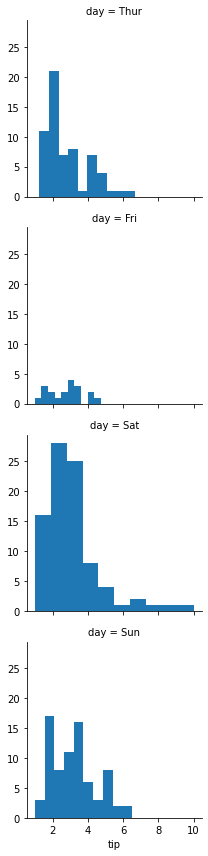

In [37]:
g = sns.FacetGrid(tips, row="day")
g = g.map(plt.hist, "tip")